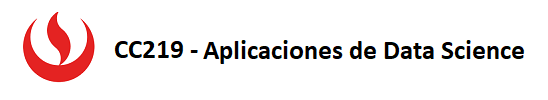

##**Paso #1:**Conjunto de Datos

El conjunto de datos **FASHION MNIST** consta de 70.000 imágenes divididas en 60.000 muestras de entrenamiento y 10.000 muestras de prueba. Una imagen está asociada con una etiqueta de 10 clases.

Las 10 clases son las siguientes:

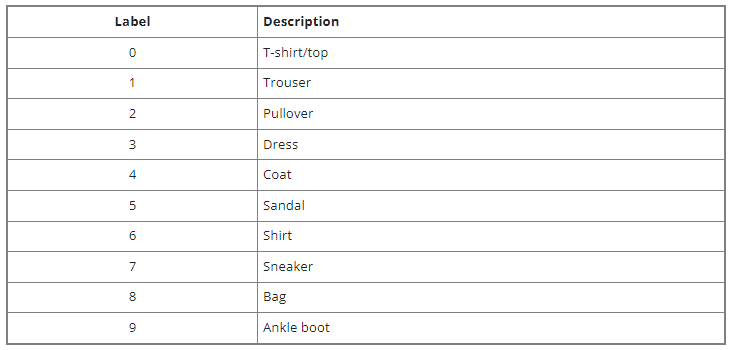


Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255.


##**Paso #2:** Carga de datos

In [30]:
import pandas as pd # Import Pandas para la manipulación de datos utilizando dataframes
import numpy as np # Import Numpy para análisis estadístico de datoss
import matplotlib.pyplot as plt # Import matplotlib para visualización de datos
import seaborn as sns
import random

In [31]:
#  Creación de dataframes para conjuntos de datos de entrenamiento y prueba.

#test_df = pd.read_csv('mnist_test.csv', sep = ',')
#train_df = pd.read_csv('mnist_train.csv',sep=',')

test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')

## **Paso #3:** Visualización de los datos

In [32]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [36]:
train_df.shape

(60000, 785)

In [38]:
test_df.shape

(10000, 785)

In [39]:
#Crear matrices de entrenamiento y prueba
train = np.array(train_df, dtype='float32')
test = np.array(test_df, dtype='float32')

In [40]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

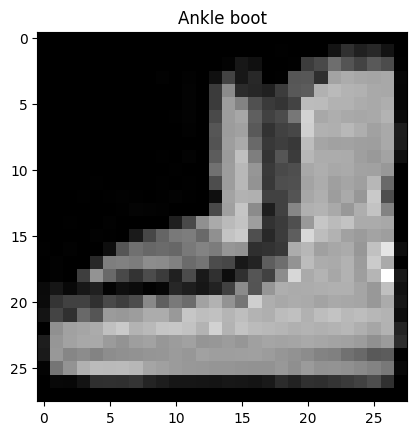

In [43]:
# Veamos algunas de las imagenes
i = random.randint(1,60000) # seleccionamos aleatoriamente un indice entre 1 y 60,000
plt.imshow(train[i,1:].reshape((28,28))) # redimensionamos y visualizamos la imagen

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # redimensionamos y visualizamos la imagen

label_index = train_df["label"][i]
plt.title(f"{class_names[label_index]}")

In [44]:
#Etiqueta de la imagen
label = train[i,0]
label

9.0

In [45]:
# Veamos más imágenes en formato de cuadrícula.
# Definir las dimensiones de la cuadrícula de la trama.

W_grid = 10
L_grid = 10

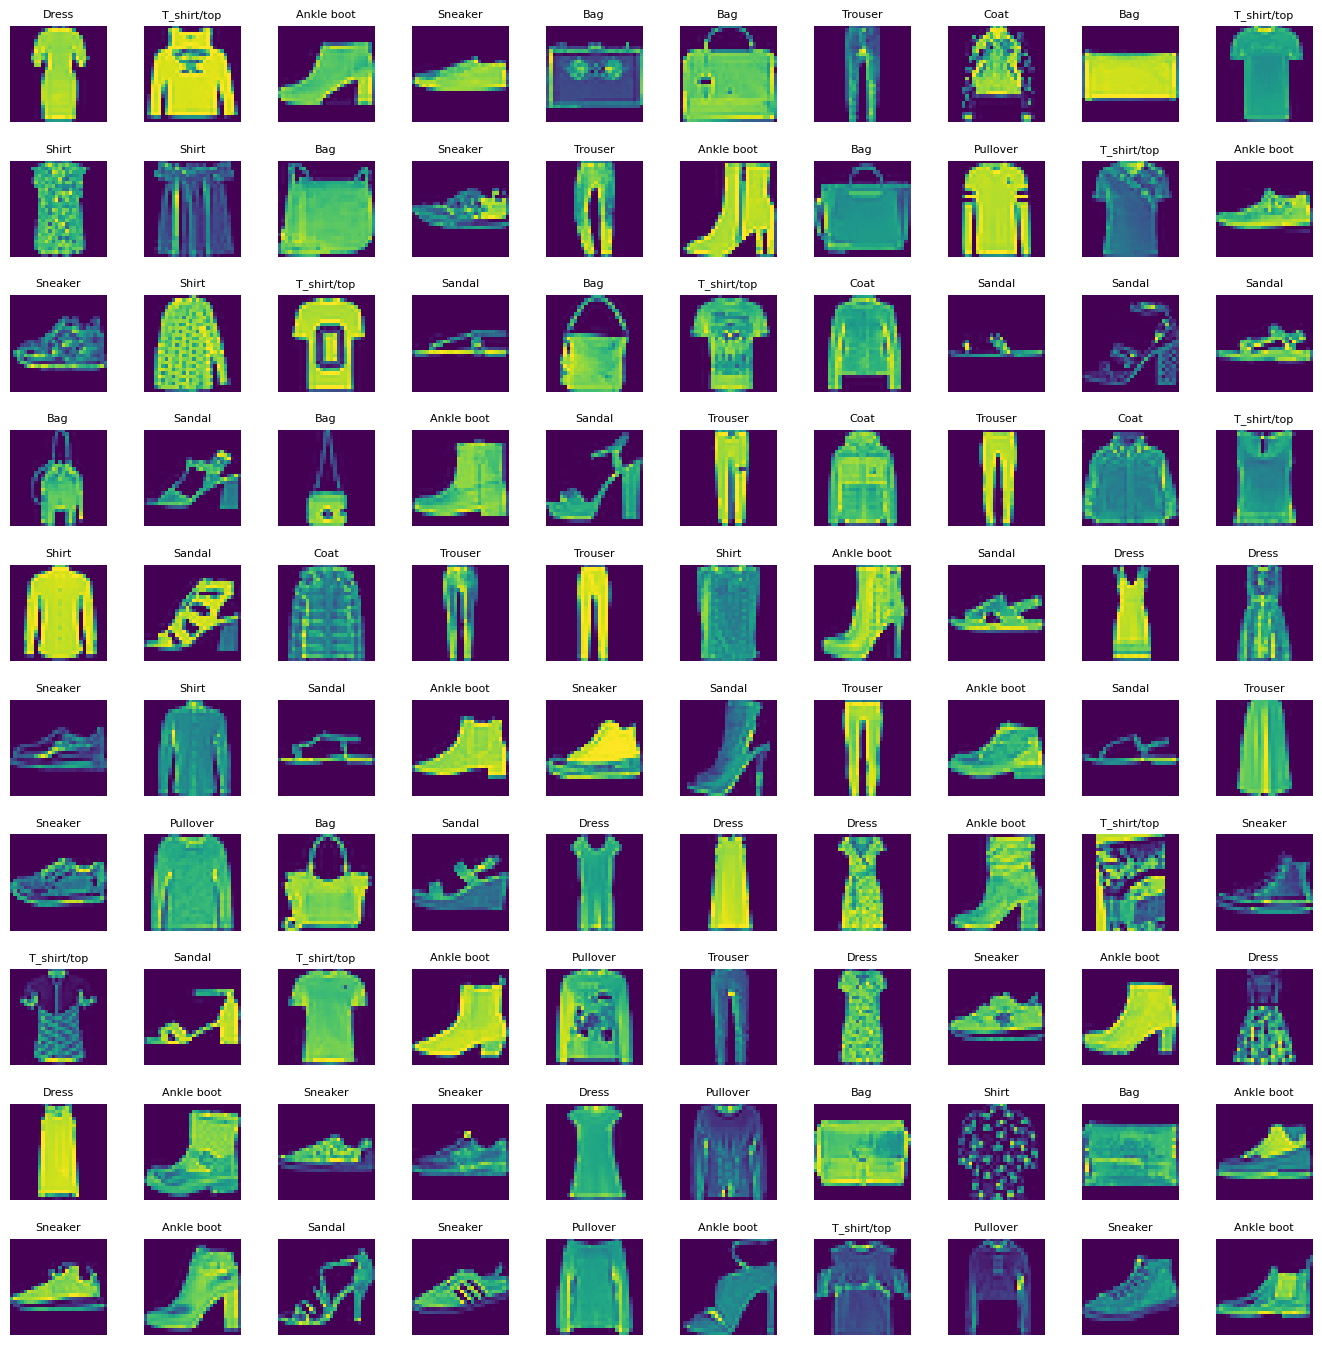

In [46]:
# fig, axes = plt.subplots(L_grid, W_grid)
# subplot devuelve el objeto de figura y el objeto de ejes
# podemos utilizar el objeto de ejes (el axes) para visualizar las figuras en varias ubicaciones

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # aplanar la matriz de 15 x 15 en una matriz de 225

n_train = len(train) # obtener la longitud del conjunto de datos de entrenamiento

# Seleccionamos un número aleatorio de 0 a n_train
for i in np.arange(0, W_grid * L_grid): # se crea espacios uniformes variables

    # Seleccionar un numero aleatorio
    index = np.random.randint(0, n_train)
    # leer y mostrar una imagen con el índice seleccionado
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


Estas imagenes debemos **Escalarlas** a un rango de 0 a 1 antes de introducirlas como datos de entrada al modelo de red neuronal.

Para hacerlo, dividiremos los valores entre 255. Es importante que el conjunto de entrenamiento y el conjunto de prueba se preprocesen de la misma manera:

In [47]:
# Preparamos el conjunto de datos de entrenamiento y prueba.
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

Para verificar que los datos estén en el formato correcto y que esté listo para construir y entrenar la red, mostremos las primeras 25 imágenes del conjunto de entrenamiento y mostremos el nombre de la clase debajo de cada imagen.

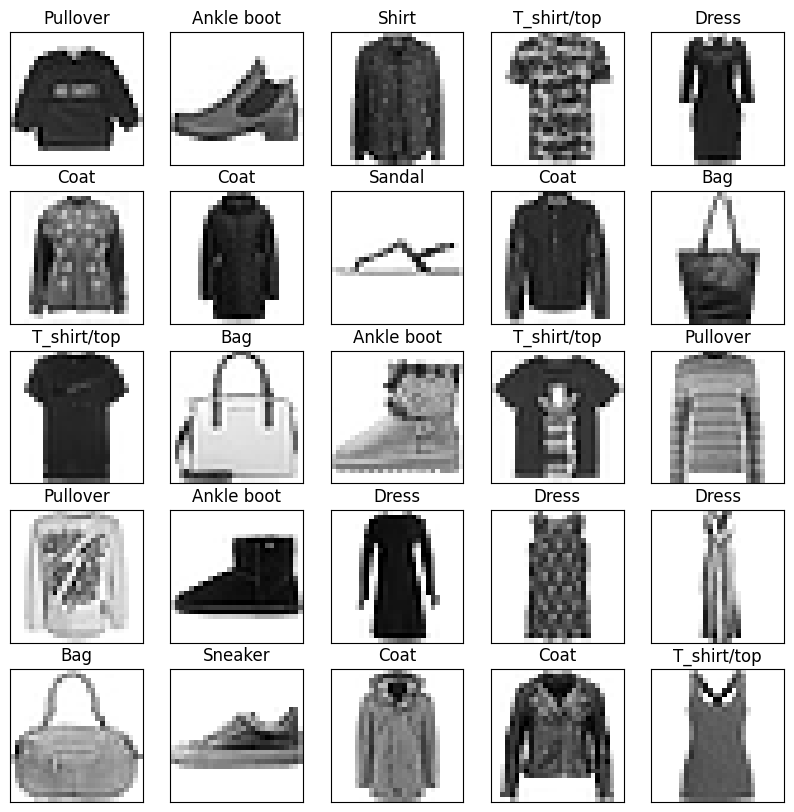

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Distribucion de clases en el conjunto de Prueba')

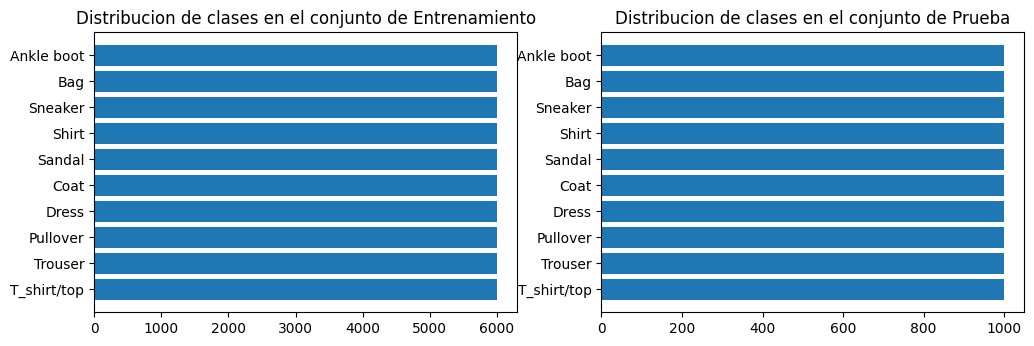

In [49]:
#Visualizamos la distribucion de las clases en cada set de datos (entrenamiento y prueba)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Distribucion de clases en el conjunto de Entrenamiento')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Distribucion de clases en el conjunto de Prueba')

## **Paso #4:** Entrenando el Modelo

Dividimos nuestros datos de entrenamiento en conjuntos de datos de entrenamiento y validación para entrenar nuestro modelo y validarlo utilizando el conjunto de datos de validación para evitar el sobreajuste antes de probar el modelo en los conjuntos de datos de prueba, que son datos del mundo real para nuestro modelo.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [52]:
# el * descomprime la tupla
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


#### **(a) Construir el Modelo**

La construcción de la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

#### **(b) Configurar las capas**

El componente básico de una red neuronal es la capa (Layer). Las capas extraen representaciones de los datos que se les introducen. Es de esperar que estas representaciones sean significativas para el problema que nos ocupa.

La mayor parte del aprendizaje profundo consiste en encadenar capas simples. La mayoría de las capas, como tf.keras.layers.Dense, tienen parámetros que se aprenden durante el entrenamiento.

In [54]:
import keras
import tensorflow as tf

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [56]:
#Construccion del modelo
cnn_model = Sequential()

# Configuramos el modelo
# Probamos primero con 32 filtros y luego con 64

# 32 filtros
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

# 64 filtros
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))


### #1
La primera capa de esta red, **keras.layers.Flatten**, transforma el formato de las imágenes de una matriz bidimensional (de 28 por 28 píxeles) a una matriz unidimensional (de 28 * 28 = 784 píxeles).

Pensemos en esta capa como si se desapilaran filas de píxeles en la imagen y se alinearan. Esta capa no tiene parámetros para aprender; solo reformatea los datos.

### #2
Una vez aplanados los píxeles, la red consta de una secuencia de dos **keras.capas.capas** densas. Se trata de capas neuronales densamente conectadas o completamente conectadas.

- La primera capa densa tiene 128 nodos (o neuronas).
- La segunda (y última) capa es una capa softmax de 10 nodos que devuelve una matriz de 10 puntuaciones de probabilidad que suman 1. Cada nodo contiene una puntuación que indica la probabilidad de que la imagen actual pertenezca a una de las 10 clases.

In [57]:
#Configuracion de las capas

#1
cnn_model.add(Flatten())
#2
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

#### **(c) Compilar el modelo**

Antes de que el modelo esté listo para el entrenamiento, necesita algunas configuraciones más. Estos se agregan durante el paso de compilación del modelo:

- **Loss function (Función de pérdida):** mide la precisión del modelo durante el entrenamiento. Desea minimizar esta función para "dirigir" el modelo en la dirección correcta.

- **Optimizer (Optimizador):**así es como se actualiza el modelo en función de los datos que ve y su función de pérdida.

- **Metrics (Métricas):** se utilizan para monitorear los pasos de entrenamiento y prueba. El siguiente ejemplo utiliza precisión, la fracción de imágenes que están clasificadas correctamente.

In [58]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

#### **(d) Entrenar el Modelo**

Entrenar el modelo de red neuronal requiere los siguientes pasos:

- Ingresar los datos de entrenamiento al modelo. En este ejemplo, los datos de entrenamiento están en los arreglos **X_train** e **y_train**.

- El modelo aprende a asociar imágenes y etiquetas.

- Le pedimos al modelo que haga predicciones sobre un conjunto de prueba; en este ejemplo, la matriz **X_test**.

- Vericamos que las predicciones coincidan con las etiquetas de la matriz **y_test**.


Para comenzar el entrenamiento, ejecutamos al método **model.fit**, llamado así porque **"ajusta"** el modelo a los datos de entrenamiento:

In [59]:
epochs = 10
batch_size = 512

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/10
94/94 [==============================] - 249s 3s/step - loss: 0.6673 - accuracy: 0.7798 - val_loss: 4.0564 - val_accuracy: 0.2208
Epoch 2/10
94/94 [==============================] - 241s 3s/step - loss: 0.3607 - accuracy: 0.8670 - val_loss: 2.4405 - val_accuracy: 0.3118
Epoch 3/10
94/94 [==============================] - 240s 3s/step - loss: 0.3061 - accuracy: 0.8870 - val_loss: 2.7862 - val_accuracy: 0.3088
Epoch 4/10
94/94 [==============================] - 240s 3s/step - loss: 0.2755 - accuracy: 0.8980 - val_loss: 1.9815 - val_accuracy: 0.5099
Epoch 5/10
94/94 [==============================] - 234s 2s/step - loss: 0.2462 - accuracy: 0.9089 - val_loss: 1.1747 - val_accuracy: 0.6308
Epoch 6/10
94/94 [==============================] - 241s 3s/step - loss: 0.2277 - accuracy: 0.9165 - val_loss: 0.5167 - val_accuracy: 0.8211
Epoch 7/10
94/94 [==============================] - 243s 3s/step - loss: 0.2133 - accuracy: 0.9209 - val_loss: 0.3056 - val_accuracy: 0.8905
Epoch 8/10
94

Visualizamos la evolución del modelo durante su entrenamiento

Text(0.5, 1.0, 'Evolución de la Precisión (Accuracy evolution)')

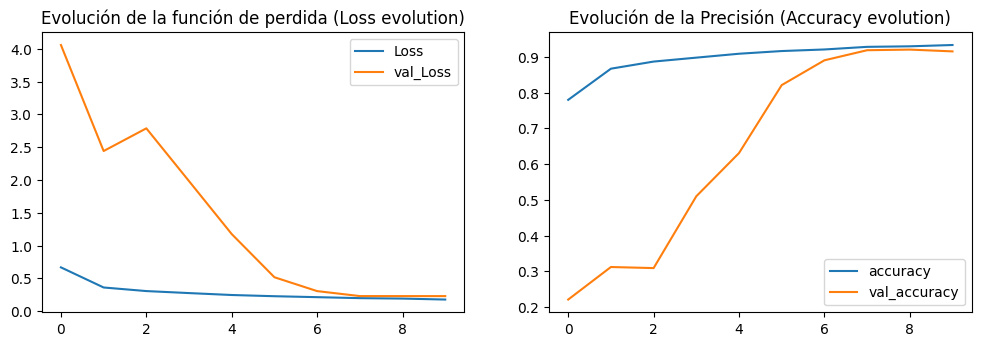

In [60]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Evolución de la función de perdida (Loss evolution)')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Evolución de la Precisión (Accuracy evolution)')

## **Paso #5:** Evaluando el Modelo

#### **(a) Precision de la Prueba**

In [61]:
evaluacion = cnn_model.evaluate(X_test, y_test)
print(f'Precisión de la prueba (Test Accuracy) : {evaluacion[1]:.3f}')

313/313 [==============================] - 12s 39ms/step - loss: 0.2205 - accuracy: 0.9206
Precisión de la prueba (Test Accuracy) : 0.921


Resulta que la precisión del conjunto de datos de prueba es un poco menor que la precisión del conjunto de datos de entrenamiento. Esta brecha entre la precisión del entrenamiento y la precisión de las pruebas representa un **sobreajuste** (overfitting).

El sobreajuste se produce cuando un modelo de aprendizaje automático funciona peor con entradas nuevas y nunca antes vistas que con los datos de entrenamiento.

#### **(b) Hacer prediccones**

Con el modelo entrenado, puedes usarlo para hacer predicciones sobre algunas imágenes.

In [62]:
# obtener las predicciones para los datos de prueba
clases_predichas = cnn_model.predict(X_test)
clases_predichas = np.argmax(clases_predichas, axis=1)

313/313 [==============================] - 12s 39ms/step


Aquí, el modelo ha predicho la etiqueta para cada imagen en el conjunto de prueba. Echemos un vistazo a la primera predicción:

In [63]:
test_img = X_test[0]
prediccion = cnn_model.predict(X_test)
prediccion[0]

313/313 [==============================] - 12s 39ms/step


array([9.9704981e-01, 8.8019242e-08, 1.7033954e-05, 4.5303867e-05,
       7.4179137e-05, 8.0425070e-07, 2.8123441e-03, 1.6544912e-07,
       2.7403391e-07, 5.5040781e-09], dtype=float32)

Una predicción es un arreglo de 10 números. Representan la "confianza" del modelo en que la imagen corresponde a cada una de las 10 prendas diferentes.

Podemos observar cual de las etiquetas tiene el valor de confianza más alto:

In [64]:
np.argmax(prediccion[0])

0

Por lo tanto, el modelo está más seguro de que esta imagen es un T-shirt/top, o class_names[0].

Examinemos la etiqueta de prueba, la cual muestra que esta clasificación es correcta:

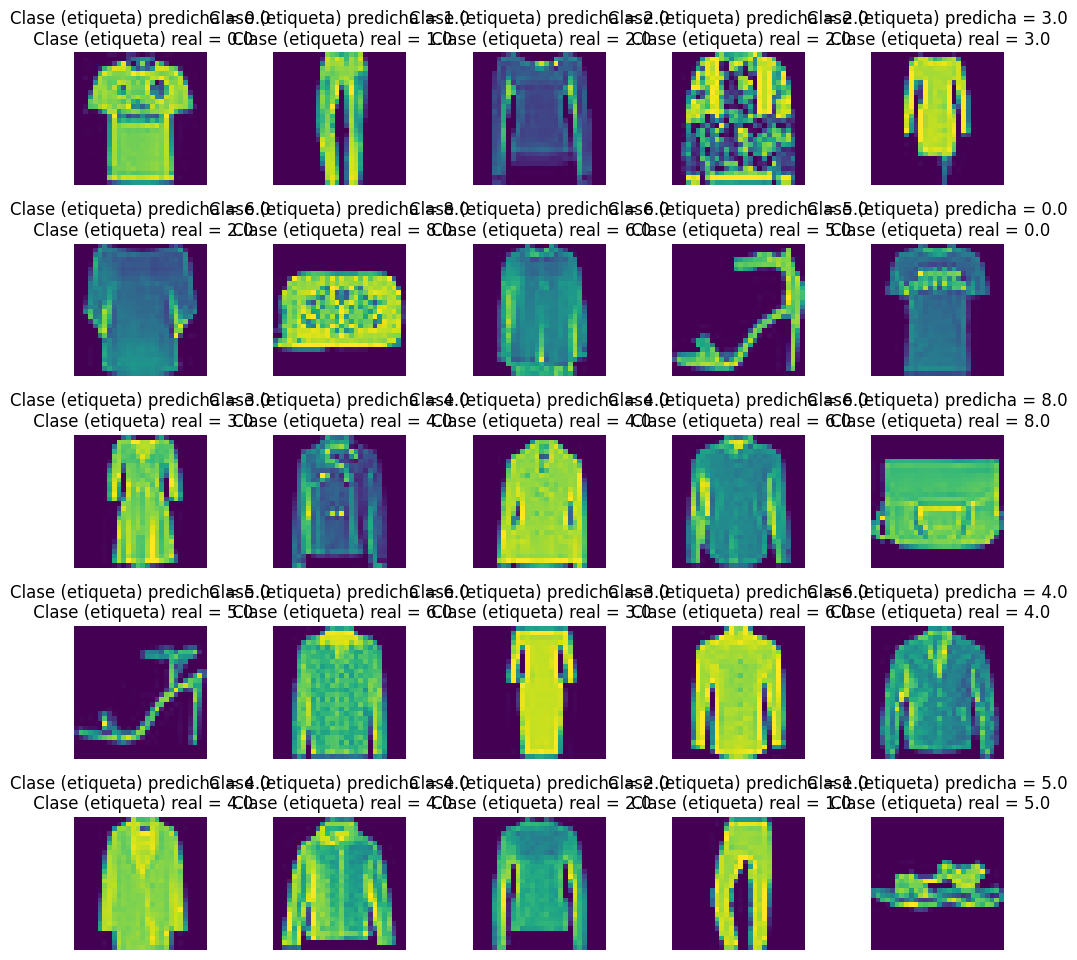

In [65]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Clase (etiqueta) predicha = {(clases_predichas[i]):0.1f}\n Clase (etiqueta) real = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

#### **(c) Herramientas para evaluar**

- Matriz de Confusión
- Reporte de Clasificación

<Axes: >

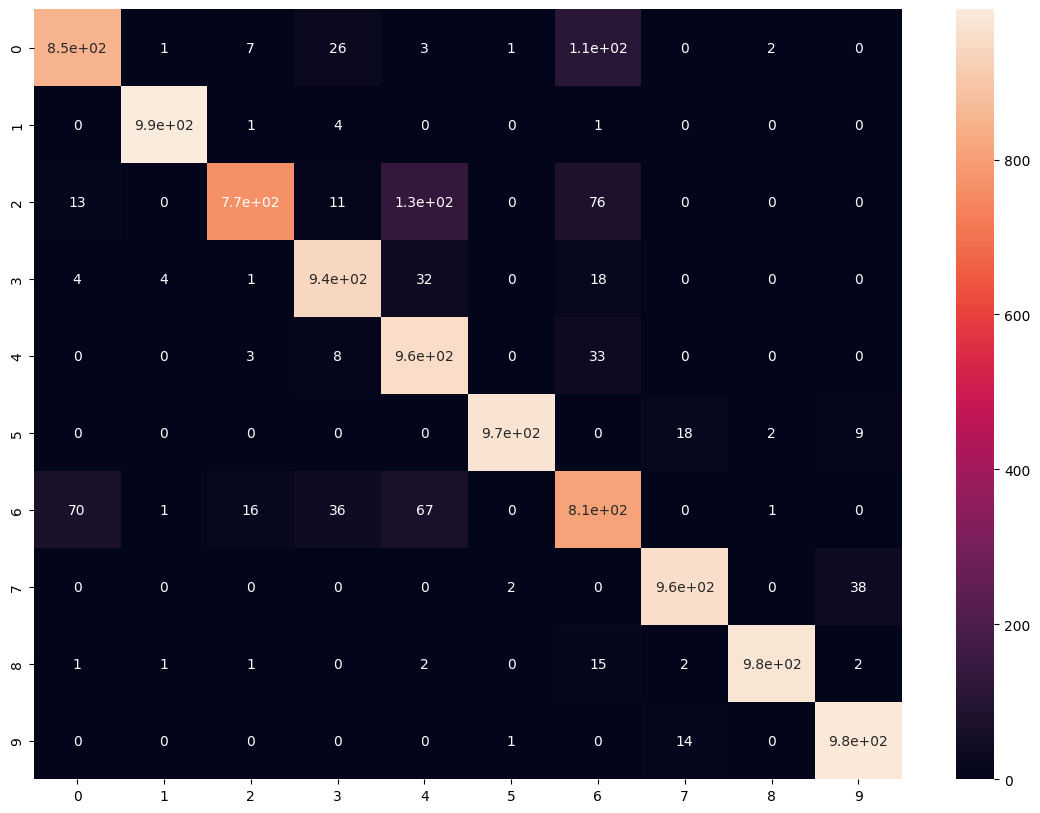

In [66]:
#Matriz de Confusión

# Suma el elemento diagonal para obtener los valores correctos verdaderos totales
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clases_predichas)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)



In [67]:
#Reporte de Clasificación

from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Clase (etiqueta) {i}" for i in range(num_classes)]

print(classification_report(y_test, clases_predichas, target_names = target_names))

                    precision    recall  f1-score   support

Clase (etiqueta) 0       0.91      0.85      0.88      1000
Clase (etiqueta) 1       0.99      0.99      0.99      1000
Clase (etiqueta) 2       0.96      0.77      0.85      1000
Clase (etiqueta) 3       0.92      0.94      0.93      1000
Clase (etiqueta) 4       0.80      0.96      0.87      1000
Clase (etiqueta) 5       1.00      0.97      0.98      1000
Clase (etiqueta) 6       0.76      0.81      0.78      1000
Clase (etiqueta) 7       0.97      0.96      0.96      1000
Clase (etiqueta) 8       0.99      0.98      0.99      1000
Clase (etiqueta) 9       0.95      0.98      0.97      1000

          accuracy                           0.92     10000
         macro avg       0.92      0.92      0.92     10000
      weighted avg       0.92      0.92      0.92     10000

